In [1]:
using ChaoticMessages
using Plots
using DifferentialEquations
using LaTeXStrings

In this tutorial, we explore how to send binary messages secretly using chaos. To do this, we will use parameter modulation where $b$ varies with time. The pair of chaotic dynamical systems will only synchronize if the values of $b$ are the same between both of them. Otherwise, the error will be non-zero. 

We first encode a binary string into a function of time. If the binary digit is $0$, then the result is `b_zero = 4.0` and if the binary digit is $1$, then the result is `b_one = 4.4`. Each digit is spaced by a time interval of $t=2$. Anything else that do not correspond to any of the position of the binary string is mapped to the value of `b_zero`. 

In [2]:
message_unencrypted = binary_to_bmessage("101010")
println(message_unencrypted(0.0)) # first position of the string 
println(message_unencrypted(2.0)) # second position of the string 
println(message_unencrypted(4.0)) # third position of the string 
println(message_unencrypted(6.0)) # fourth position of the string 
println(message_unencrypted(14.0)) # correspond to no position of the string 
println(message_unencrypted(-1.0)) # correspond to no position of the string 

4.4
4.0
4.4
4.0
4.0
4.0


We now use this in the transmitter's chaotic system which is given by 

\begin{align*}
\dot{x_T} &= \sigma (y_T - x_T), \\ 
\dot{y_T} &= rx_T - y_T - 20 x_T z_T, \\ 
\dot{z_T} &= 5 x_T y_T - b(t)z_T,
\end{align*}

Notice that $b(t)$ is a function of time now. This is the parameter modulation. 

The x-component of the trajectory is plotted, and we see that the message is encrypted.

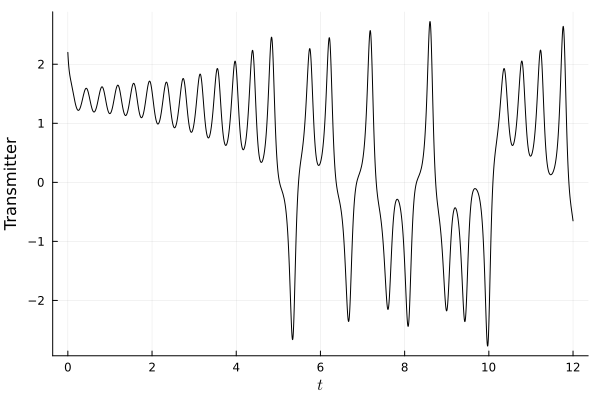

In [3]:
u0 = [2.2, 1.3, 2.0] # initial conditions 
p = [16.0, 4.0, 45.6] # parameters (second value is ignored for now)
tspan = (0.0, 12.0) # time span 

secret_message = create_secret_message(
    u0,
    p,
    tspan,
    message_unencrypted,
    binary = true,
)

plot(secret_message, tspan..., xticks = 0:2:12, legend = false, xaxis=L"t", yaxis="Transmitter",linecolor="black")

To decrypt the secret message, we use the receiver's dynamical system which is 

\begin{align*}
\dot{x_R} &= \sigma (y_R - x_R), \\ 
\dot{y_R} &= rx_T - y_R - 20 x_T z_R, \\ 
\dot{z_R} &= 5 x_T y_R - bz_R,
\end{align*}

If $b=4.0$, then synchronization occurs and if $b=4.4$, then synchronization does not occur. The result of `decrypt_secret_message` is the error squared between the x-component of the transmitter's solution and the x-component of the receiver's solution. If the error is close to zero, then the binary digit must be $0$ and otherwise, the binary digit is $1$. 

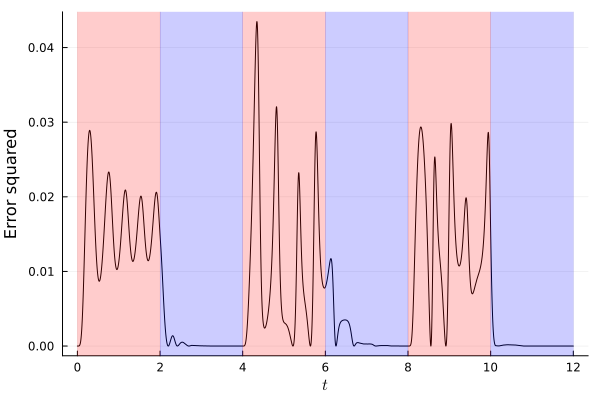

In [4]:
# result is the difference between the x_T and x_R squared
error_squared = decrypt_secret_message(
    u0,
    p,
    tspan,
    secret_message,
    binary = true
)

p = plot(error_squared, tspan..., xticks = 0:2:12, xaxis=L"t", yaxis="Error squared",linecolor="black")

for i in [0, 4, 8]
    vspan!(p, [i, i + 2], linecolor = :red, fillcolor = :red, fillalpha = 0.2, legend = false)
end 
for i in [2, 6, 10]
    vspan!(p, [i, i + 2], linecolor = :blue, fillcolor = :blue, fillalpha = 0.2, legend = false)
end 
current() # update plot 